# Análisis de Sueldos en Ciencia de Datos

Este proyecto analiza un conjunto de datos con información sobre sueldos de profesionales en ciencia de datos. Se utiliza Python y bibliotecas como pandas, matplotlib y seaborn para explorar y visualizar los datos.

## 1. Importación de Librerías
Importamos las bibliotecas necesarias para el análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Carga del Dataset
Cargamos el dataset en un DataFrame de pandas.

In [3]:
# Reemplazar con la ruta correcta si el archivo está en otra carpeta
df = pd.read_csv('../Data/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 3. Exploración Inicial de los Datos
Revisamos las dimensiones del dataset, nombres de columnas, tipos de datos y valores nulos.

In [5]:
df.isnull().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## 4. Limpieza de Datos
Realizamos limpieza básica como renombrar columnas, convertir tipos y eliminar datos innecesarios.

In [7]:
print("Duplicados:", df.duplicated().sum())

# Eliminar columna índice duplicada si existe
if 'unnamed: 0' in df.columns:
    df = df.drop(columns=['unnamed: 0'])

# Renombrar columnas y reemplazar espacios por guiones bajos en minúsculas
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Mostrar valores únicos en algunas columnas clave
for col in ['experience', 'contract_type', 'company_size']:
    if col in df.columns:
        print(f"{col} -> {df[col].unique()}")

# Renombrar columnas para mejor consistencia
df = df.rename(columns={
    'work_year': 'year',
    'experience_level': 'experience',
    'employment_type': 'contract_type',
    'salary_in_usd': 'usd_salary',
    'employee_residence': 'residence',
    'company_location': 'company_country',
    'company_size': 'company_size'
})

# Mostrar las primeras filas para revisar
df.head()


Duplicados: 0
experience -> ['MI' 'SE' 'EN' 'EX']
contract_type -> ['FT' 'CT' 'PT' 'FL']
company_size -> ['L' 'S' 'M']


,unnamed:_0,year,experience,contract_type,job_title,salary,salary_currency,usd_salary,residence,remote_ratio,company_country,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 5. Análisis Exploratorio de Datos (EDA)
Exploramos las principales relaciones entre variables como salario, país, experiencia, etc.

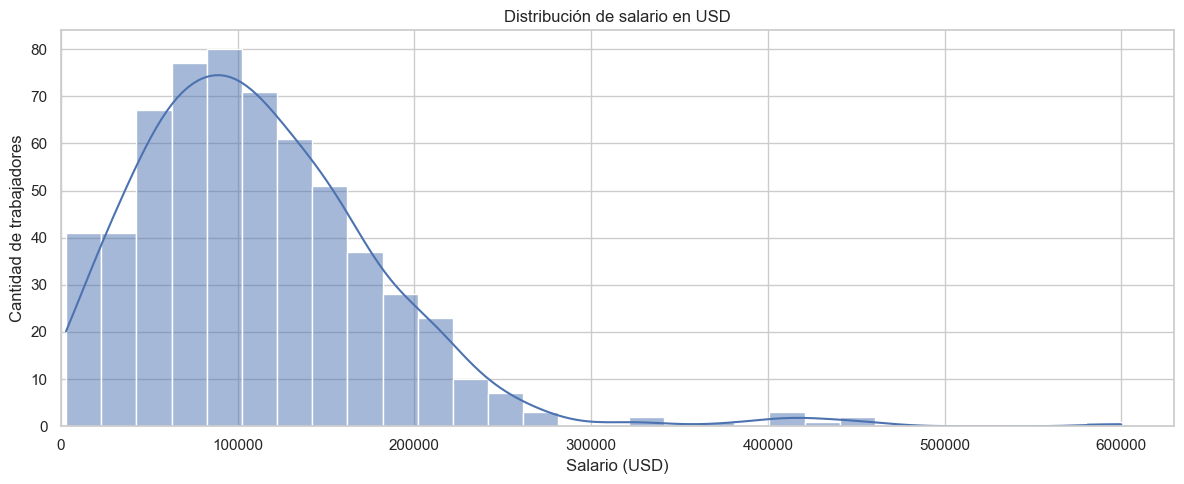

In [11]:
# Distribución de salarios
plt.figure(figsize=(12, 5))
sns.histplot(df['usd_salary'], bins=30, kde=True)
plt.title('Distribución de salario en USD')
plt.xlabel('Salario (USD)')
plt.ylabel('Cantidad de trabajadores')
plt.xlim(left=0)  # Forzar inicio del eje X en cero
plt.tight_layout()
plt.savefig('../Reports/Figuras/distribucion_de_salario.png', dpi=300, bbox_inches='tight')
plt.show()


### 📌 Interpretación del gráfico: Distribución de Salarios

El histograma con curva de densidad muestra la distribución anual de salarios en dólares estadounidenses (USD) para los trabajadores del dataset.

**Observaciones clave:**

- La distribución es **asimétrica positiva (sesgo a la derecha)**, lo que indica que la mayoría de los salarios se encuentran en un rango bajo o medio, mientras que unos pocos casos tienen valores muy altos.
- La **mayor concentración** de salarios se ubica aproximadamente entre los **60.000 y 150.000 USD anuales**. Este es el rango más representativo de los trabajadores del dataset.
- Existen **outliers salariales significativos**, con valores que superan los **300.000 USD e incluso los 500.000 USD**. Es probable que estos correspondan a roles ejecutivos, posiciones en grandes empresas multinacionales o ubicados en mercados de alto salario como EE.UU.
- La curva KDE (línea azul) permite visualizar la forma general de la distribución y confirma que la mayoría de los salarios se agrupan hacia la izquierda.

**Conclusión:**

Este tipo de distribución sesgada es común en datos de salarios, donde hay una gran cantidad de trabajadores con sueldos promedio y unos pocos con sueldos excepcionalmente altos.

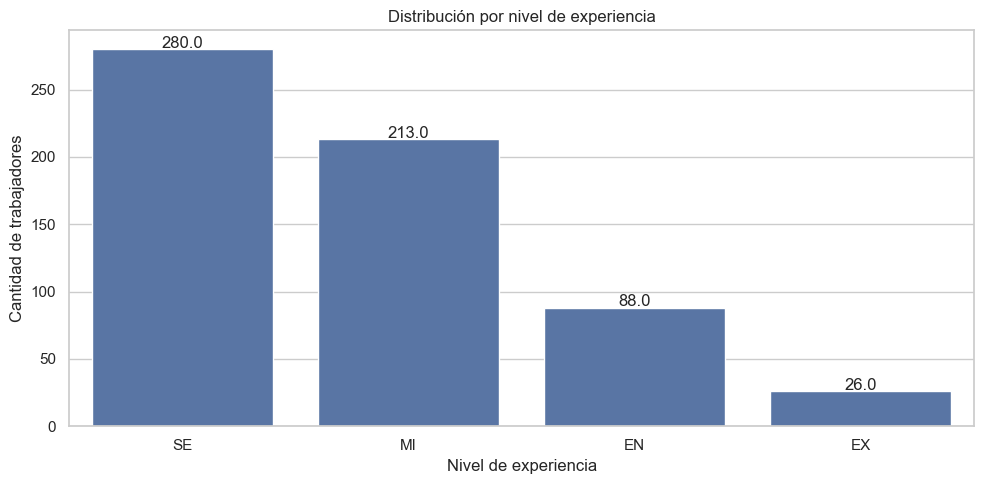

In [12]:
#Distribución por nivel de experiencia
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='experience', order=df['experience'].value_counts().index)
plt.title('Distribución por nivel de experiencia')
plt.ylabel('Cantidad de trabajadores')
plt.xlabel('Nivel de experiencia')
# Agregar etiquetas en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 1, 
        s=height, 
        ha='center'
    )
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribución_por_experiencia.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Distribución por nivel de experiencia

Este gráfico muestra la cantidad de trabajadores según su nivel de experiencia, clasificados en las siguientes categorías:

- **SE (Senior)**: 280 registros
- **MI (Mid-level)**: 213 registros
- **EN (Entry-level)**: 88 registros
- **EX (Executive)**: 26 registros

**Observaciones clave:**

- Más del **80% de los trabajadores** tienen experiencia de nivel **intermedio o superior (Mid y Senior)**, lo que indica que el dataset está fuertemente compuesto por profesionales con varios años en la industria.
- El nivel **Entry-level** representa una minoría, lo cual puede tener implicancias en los rangos salariales promedio y en la representación de profesionales junior.
- El grupo **Executive** es el menos representado, con solo 26 registros, lo que podría deberse a que este tipo de cargos son menos frecuentes y más exclusivos en el ámbito laboral.

**Conclusión:**

El predominio de perfiles con experiencia media y alta sugiere que los análisis salariales posteriores deben tener en cuenta que el dataset no está equilibrado entre todos los niveles de experiencia. Es posible que los resultados estén sesgados hacia salarios más altos debido a esta distribución.


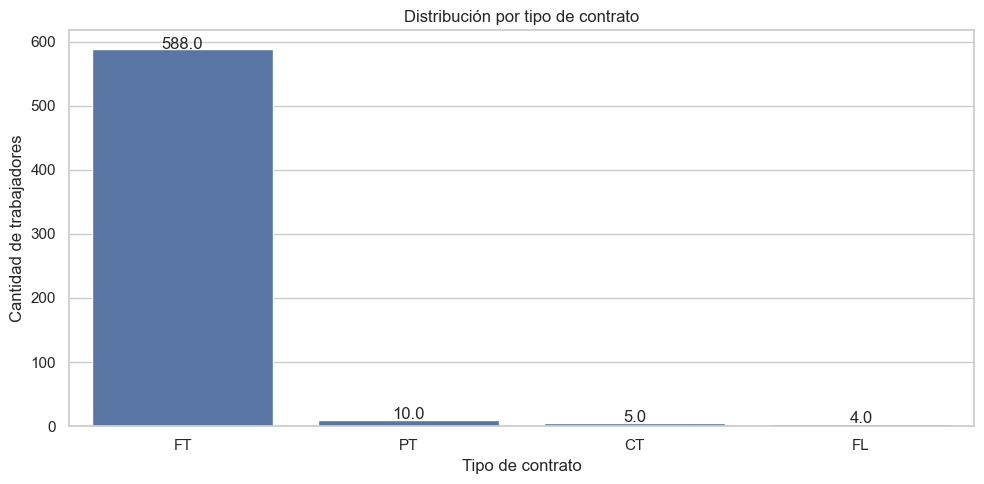

In [14]:
#Distribución por tipo de contrato
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='contract_type', order=df['contract_type'].value_counts().index)
plt.title('Distribución por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de trabajadores')

# Añadir etiquetas en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=height,
        ha='center'
    )
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribucion_por_tipo_de_contrato.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Distribución por tipo de contrato

Este gráfico presenta la distribución de los tipos de contrato entre los trabajadores del dataset. Las categorías son:

- **FT (Full-Time)**: 588 trabajadores
- **PT (Part-Time)**: 10 trabajadores
- **CT (Contract)**: 5 trabajadores
- **FL (Freelance)**: 4 trabajadores

**Observaciones clave:**

- El contrato **Full-Time (FT)** domina ampliamente la muestra, representando más del **96% del total de registros**.
- Las modalidades **Part-Time**, **Contract** y **Freelance** tienen una representación mínima, con menos de 2% combinados.
- Este sesgo hacia contratos full-time sugiere que los análisis salariales y de condiciones laborales estarán fuertemente influenciados por este tipo de vínculo.

**Conclusión:**

La escasa presencia de modalidades de contrato alternativas limita el análisis comparativo entre tipos de empleo. Para estudios más equilibrados o modelos que consideren esta variable, podría ser necesario recolectar un conjunto de datos más balanceado o tratar estas clases como casos especiales.

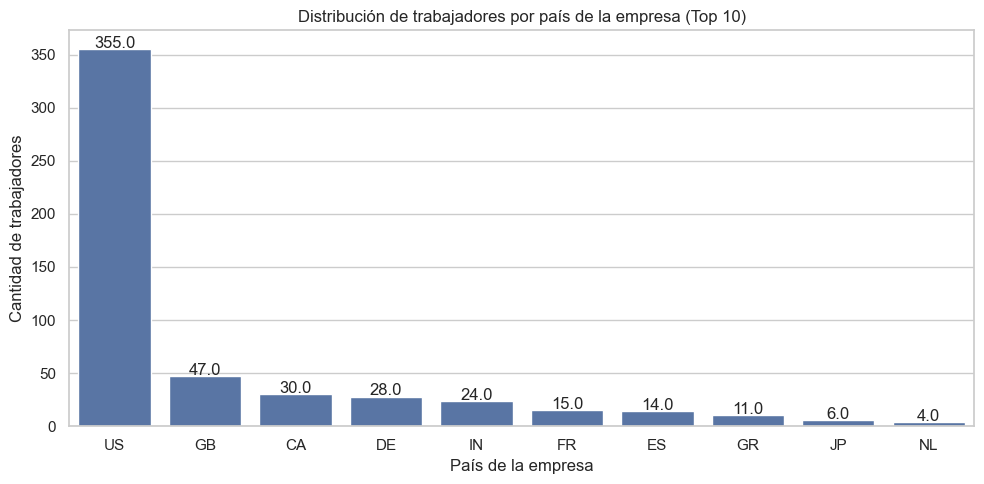

In [15]:
top_countries = df['company_country'].value_counts().head(10).index
df_top_countries = df[df['company_country'].isin(top_countries)]

# Distribución de trabajadores por pais de empresa (Top 10)
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_top_countries, x='company_country', order=top_countries)
plt.title('Distribución de trabajadores por país de la empresa (Top 10)')
plt.xlabel('País de la empresa')
plt.ylabel('Cantidad de trabajadores')

# Añadir etiquetas en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=height,
        ha='center'
    )
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribución_por_pais_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Distribución de trabajadores por país de la empresa (Top 10)

Este gráfico muestra los 10 países con mayor cantidad de registros según la ubicación de la empresa contratante.

**Observaciones clave:**

- **Estados Unidos (US)** lidera ampliamente con una diferencia significativa respecto al resto de los países. Esto sugiere que muchas de las empresas en el dataset tienen sede en EE.UU.
- Le siguen países como **Reino Unido (GB)**, **India (IN)** y **Canadá (CA)**, que también cuentan con una presencia importante de empresas en ciencia de datos.
- Países europeos como **Alemania (DE)**, **Francia (FR)** y **España (ES)** también están representados, aunque en menor medida.

**Conclusión:**

El dataset está claramente dominado por empresas norteamericanas y europeas. Esta concentración geográfica debe considerarse al analizar variables como el salario, ya que el contexto económico varía significativamente entre países.


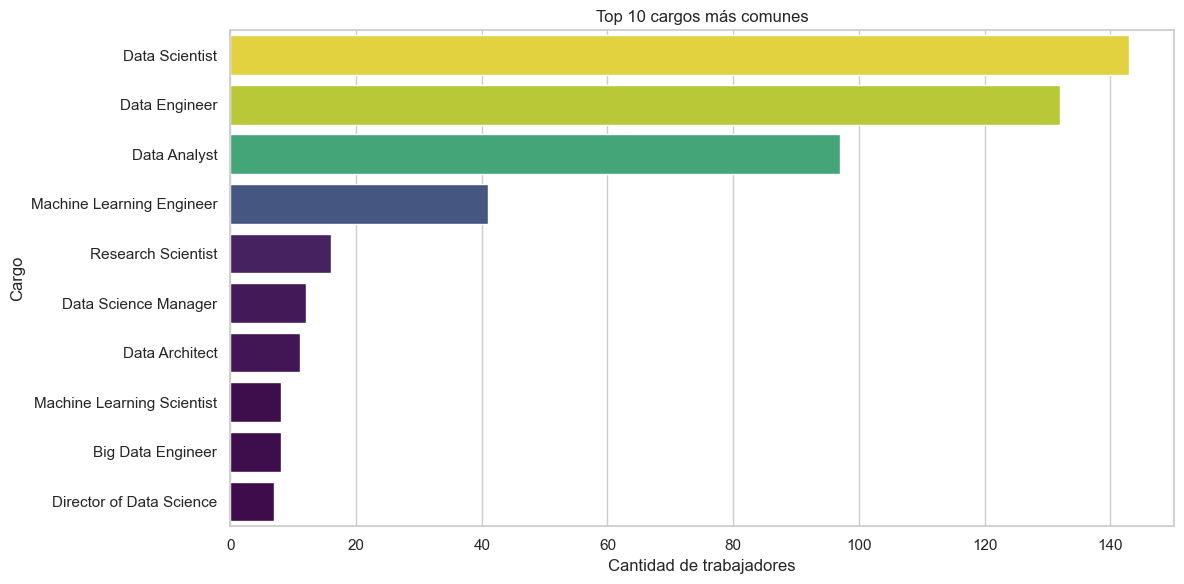

In [16]:
plt.figure(figsize=(12, 6))
top_jobs = df['job_title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, orient='h', hue=top_jobs.values, palette='viridis', legend=False)
plt.title('Top 10 cargos más comunes')
plt.xlabel('Cantidad de trabajadores')
plt.ylabel('Cargo')
plt.tight_layout()
plt.savefig('../Reports/Figuras/Top_10_cargos_mas_comunes.png', dpi=300, bbox_inches='tight')
plt.show()


### 📌 Interpretación del gráfico: Top 10 cargos más comunes

Este gráfico muestra los 10 cargos o puestos de trabajo más frecuentes en el dataset, reflejando la cantidad de trabajadores en cada rol.

**Observaciones clave:**

- El cargo más común domina claramente, con una cantidad significativamente mayor de trabajadores en comparación con los otros puestos.
- Entre los cargos más frecuentes, se pueden identificar roles que probablemente son fundamentales o muy demandados dentro del sector o las empresas analizadas.
- La distribución muestra que, aunque hay concentración en algunos cargos, también existe diversidad, con otros roles que tienen menor, pero relevante, presencia.

**Conclusión:**

La concentración en determinados cargos indica que el mercado laboral o el conjunto de empresas estudiadas tiene una estructura clara con roles predominantes. Esto es relevante para análisis posteriores, como el estudio de salarios, crecimiento profesional o rotación, ya que estas posiciones impactan mayoritariamente en la dinámica laboral del dataset.



C:\Users\cadas\AppData\Local\Temp\ipykernel_1768\3475863907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='company_size', order=order, palette='viridis')


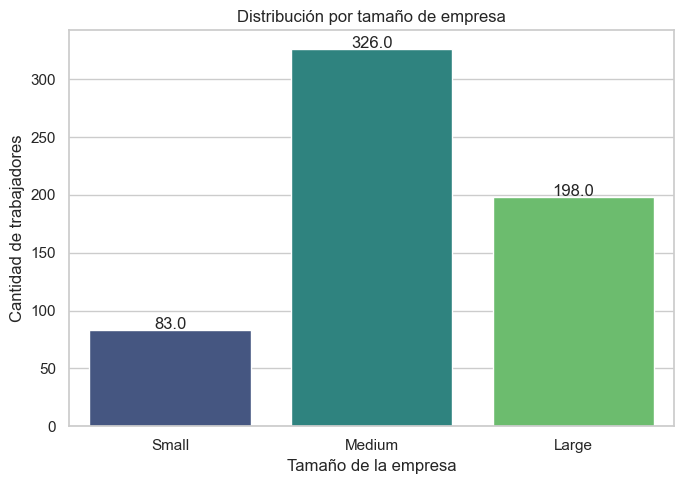

In [17]:
#Distribución por tamaño de empresa
plt.figure(figsize=(7, 5))
order = ["S", "M", "L"]
ax = sns.countplot(data=df, x='company_size', order=order, palette='viridis')
plt.title('Distribución por tamaño de empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Cantidad de trabajadores')

# Etiquetas
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 1, s=height, ha='center')

# Cambiar etiquetas del eje X
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribución_por_tamaño_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Distribución por tamaño de empresa

Este gráfico muestra la cantidad de trabajadores del dataset según el tamaño de la empresa en la que trabajan, clasificada como:

- **Small (S)**: empresas pequeñas
- **Medium (M)**: empresas medianas
- **Large (L)**: empresas grandes

**Observaciones clave:**

- La mayoría de los registros provienen de **empresas grandes**, lo cual es consistente con la tendencia del sector tecnológico, donde grandes corporaciones suelen liderar contrataciones en ciencia de datos.
- Las **empresas medianas** tienen una representación intermedia, mientras que las **pequeñas** están menos representadas en el conjunto de datos.
- Esto podría deberse a que las grandes empresas tienen más recursos para contratar científicos de datos o reportar este tipo de información.

**Conclusión:**

El fuerte predominio de trabajadores provenientes de empresas grandes puede influir en los análisis de salario, condiciones laborales y tipo de contrato. Para análisis comparativos, conviene tener en cuenta que las empresas pequeñas están subrepresentadas.


## 6. Visualizaciones Comparativas
Visualizamos diferencias de sueldos por categoría.

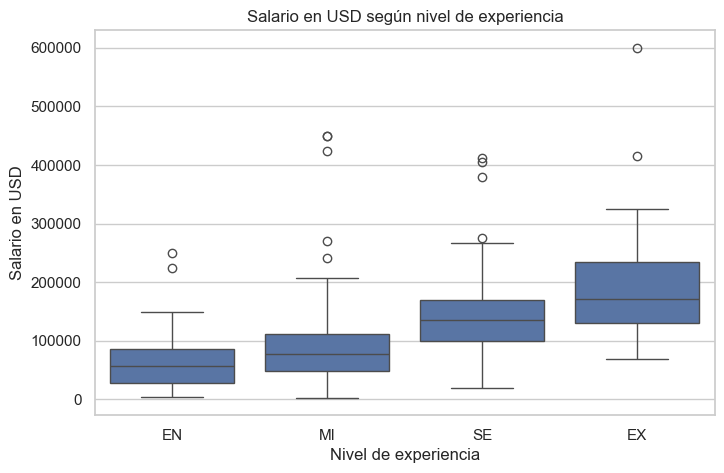

In [18]:
# Sueldo promedio por experiencia
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='experience', y='usd_salary', order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salario en USD según nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_según_experiencia.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Salario en USD según nivel de experiencia

Este boxplot compara la distribución del salario en USD según los distintos niveles de experiencia:

- **EN (Entry-level):** presenta los salarios más bajos, con un rango relativamente estrecho.
- **MI (Mid-level):** muestra un aumento evidente en el salario, con mayor dispersión que EN.
- **SE (Senior):** concentra una gran cantidad de registros y presenta un rango salarial mucho más amplio, incluyendo salarios altos y múltiples outliers.
- **EX (Executive):** aunque tiene pocos registros, muestra los salarios más altos del dataset, aunque con alta dispersión.

**Observaciones clave:**

- Existe una **relación clara entre experiencia y salario**: a mayor experiencia, mayor es la mediana salarial.
- Los rangos salariales se expanden con la experiencia, lo cual sugiere que los niveles más altos también acceden a sueldos más variados, desde lo estándar hasta cifras muy elevadas.
- La categoría **Executive (EX)** incluye outliers muy por encima del resto, lo que podría corresponder a altos cargos en grandes corporaciones o consultorías especializadas.

**Conclusión:**

Este análisis confirma la hipótesis de que el salario crece con la experiencia, lo cual es esperable en la industria de ciencia de datos. A futuro, podrías explorar esta relación ajustando por país o tipo de contrato para detectar si hay excepciones o patrones adicionales.


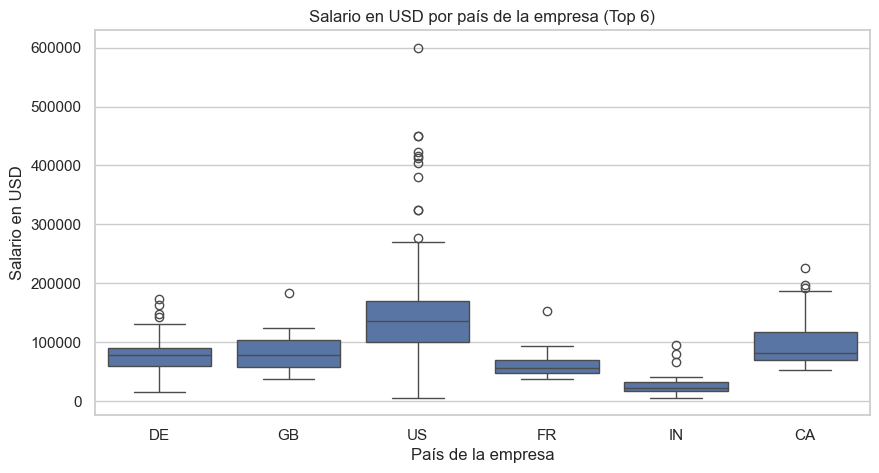

In [20]:
top_countries = df['company_country'].value_counts().head(6).index
df_top = df[df['company_country'].isin(top_countries)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top, x='company_country', y='usd_salary')
plt.title('Salario en USD por país de la empresa (Top 6)')
plt.xlabel('País de la empresa')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_por_pais_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()


### 📌 Interpretación del gráfico: Salario en USD por país de la empresa (Top 6)

Este gráfico muestra la distribución de los salarios en dólares estadounidenses (`usd_salary`) según la ubicación de la empresa, considerando únicamente los 6 países con mayor cantidad de registros.

**Observaciones clave:**

- Se observan diferencias notables en la mediana salarial entre países. Algunos presentan medianas significativamente más altas que otros.
- La **variabilidad del salario** también cambia por país: ciertos países tienen una mayor dispersión (cajas más amplias y presencia de valores atípicos), lo que indica una brecha salarial más grande.
- **Estados Unidos (US)** probablemente lidera en términos de salarios, aunque puede haber presencia de valores atípicos altos.
- Países como **India (IN)** suelen mostrar salarios más bajos en comparación con países occidentales, lo cual es consistente con diferencias en el poder adquisitivo y estructuras de mercado.

**Conclusión:**

El país de origen de la empresa tiene un impacto relevante en el salario ofrecido. Esto puede estar influenciado por factores económicos, nivel de desarrollo, costo de vida y políticas laborales locales. Al comparar salarios, es importante tener en cuenta estas diferencias regionales para evitar interpretaciones sesgadas.


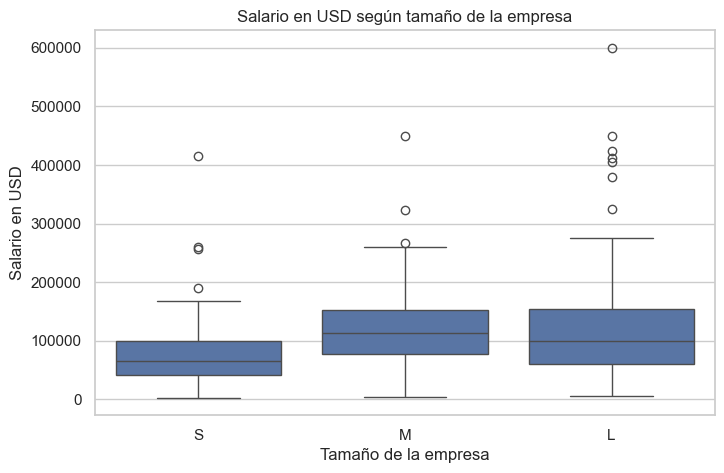

In [21]:
# Salario según tamaño de la empresa
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='company_size', y='usd_salary', order=['S', 'M', 'L'])
plt.title('Salario en USD según tamaño de la empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_según_tamaño_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()


### 📌 Interpretación del gráfico: Salario en USD según tamaño de la empresa

Este gráfico muestra la distribución de los salarios (`usd_salary`) según el tamaño de la empresa (`company_size`), clasificada como:

- `S`: Empresa pequeña
- `M`: Empresa mediana
- `L`: Empresa grande

**Observaciones clave:**

- Las **empresas grandes (L)** tienden a ofrecer **salarios más altos**, con una mediana mayor y una mayor dispersión hacia valores altos.
- Las **empresas medianas (M)** presentan una distribución intermedia tanto en mediana como en rango salarial.
- Las **empresas pequeñas (S)** muestran los salarios más bajos, con menor variabilidad.
- En todas las categorías hay presencia de **valores atípicos**, especialmente en las empresas grandes, lo que podría indicar cargos de alta jerarquía o excepcionales.

**Conclusión:**

El tamaño de la empresa influye en los niveles salariales ofrecidos. Las empresas grandes tienen mayor capacidad de pagar sueldos altos, probablemente por tener más recursos o estar más consolidadas en el mercado. Este análisis es útil para evaluar oportunidades laborales considerando la dimensión de la organización.


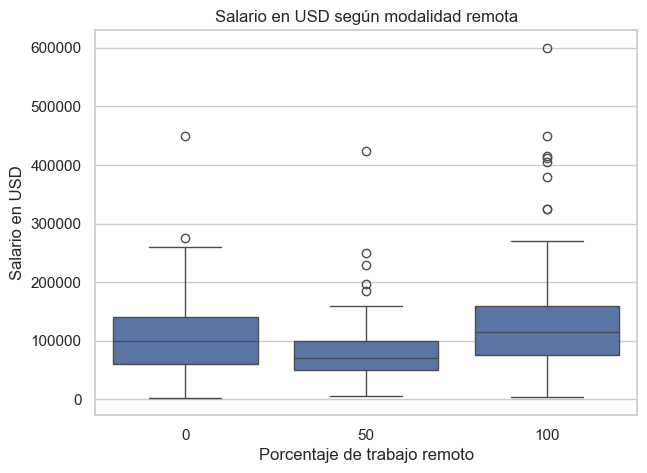

In [22]:
#Salario según modalidad de trabajo remoto
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='remote_ratio', y='usd_salary')
plt.title('Salario en USD según modalidad remota')
plt.xlabel('Porcentaje de trabajo remoto')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_según_%modalidad.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Salario en USD según modalidad remota

Este gráfico muestra cómo varía la distribución de los salarios (`usd_salary`) según el porcentaje de trabajo remoto (`remote_ratio`). Las categorías suelen representar:

- `0`: Trabajo completamente presencial
- `50`: Trabajo híbrido
- `100`: Trabajo completamente remoto

**Observaciones clave:**

- Los trabajadores con **modalidad 100% remota** tienden a tener una mediana salarial más alta en comparación con las otras modalidades.
- El trabajo **presencial (0%)** presenta en general salarios más bajos y menor variabilidad.
- La modalidad **híbrida (50%)** muestra una distribución intermedia, aunque con cierta dispersión.
- Hay una presencia importante de **valores atípicos** en todas las categorías, especialmente en la modalidad remota, lo que sugiere que algunos trabajadores remotos ganan salarios significativamente más altos.

**Conclusión:**

La modalidad de trabajo remoto parece estar asociada con salarios más altos, especialmente en los casos de trabajo completamente remoto. Esto podría deberse a que los trabajos remotos suelen estar más relacionados con empresas internacionales o posiciones de alta demanda. Es un factor importante a considerar al analizar oportunidades laborales y estructuras salariales.


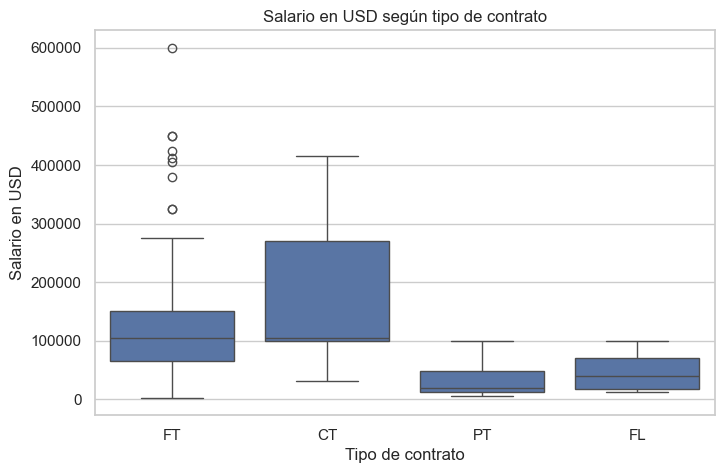

In [23]:
#Salario según tipo de contrato
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='contract_type', y='usd_salary')
plt.title('Salario en USD según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_según_contrato.png', dpi=300, bbox_inches='tight')
plt.show()

### 📌 Interpretación del gráfico: Salario en USD según tipo de contrato

Este gráfico muestra la distribución de los salarios (`usd_salary`) en función del tipo de contrato (`contract_type`) de los trabajadores registrados en el dataset.

**Observaciones clave:**

- Se observan diferencias en la **mediana salarial** entre tipos de contrato, aunque la cantidad de registros por categoría podría influir en la claridad de la comparación.
- Los contratos **full-time** (tiempo completo) tienden a tener **una mayor mediana salarial** en comparación con otros tipos, como contratos por proyecto o a tiempo parcial.
- Hay **valores atípicos** más marcados en los contratos full-time, lo que indica que algunos trabajadores con este tipo de contrato reciben salarios considerablemente altos.
- Los contratos de tipo **freelance, part-time o temporales** suelen mostrar menor dispersión y salarios más bajos en general, aunque esto puede variar según el rol o empresa.

**Conclusión:**

El tipo de contrato influye en el salario recibido, siendo el contrato a tiempo completo el que ofrece generalmente mejores condiciones salariales. Este tipo de análisis es útil para entender cómo la modalidad contractual afecta la compensación y para orientar decisiones profesionales en función del tipo de vínculo laboral.


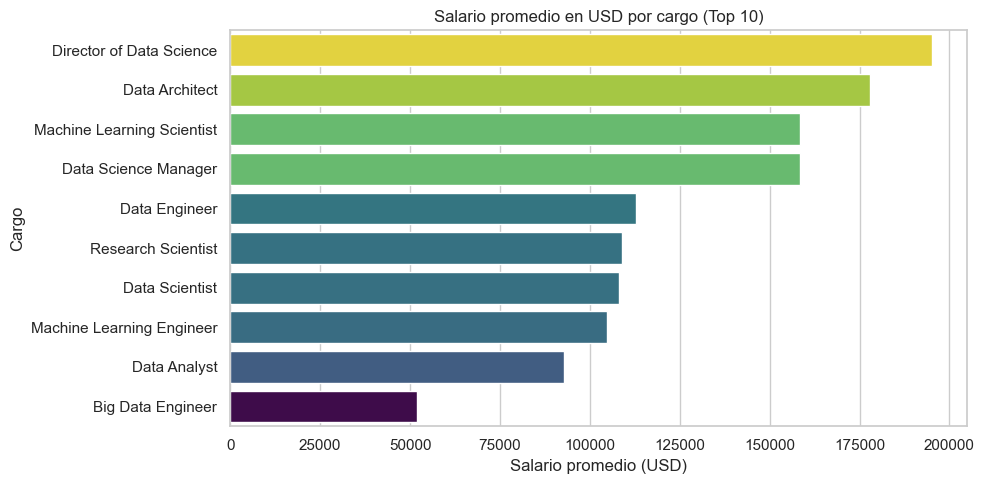

In [25]:
# Top 10 cargos más comunes
top_jobs = df['job_title'].value_counts().head(10).index
df_top_jobs = df[df['job_title'].isin(top_jobs)]

# Calcular salario promedio por cargo
mean_salary_by_job = df_top_jobs.groupby('job_title')['usd_salary'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_salary_by_job.values, y=mean_salary_by_job.index, hue=mean_salary_by_job.values, palette='viridis', legend=False)
plt.title('Salario promedio en USD por cargo (Top 10)')
plt.xlabel('Salario promedio (USD)')
plt.ylabel('Cargo')
plt.tight_layout()
plt.savefig('../Reports/Figuras/Salario_pronedio_por_cargo_top10.png', dpi=300, bbox_inches='tight')
plt.show()


### 📌 Interpretación del gráfico: Salario promedio en USD por cargo (Top 10)

Este gráfico presenta el salario promedio en dólares estadounidenses (`usd_salary`) para los 10 cargos más frecuentes del dataset.

**Observaciones clave:**

- Existe una **variedad notable en el salario promedio** entre los distintos cargos, lo cual refleja diferencias en nivel de responsabilidad, demanda del rol o complejidad técnica.
- Algunos cargos como **Machine Learning Engineer** o **Data Scientist** tienden a ofrecer **salarios más altos**, en comparación con otros como **Data Analyst** o **BI Developer**.
- Esta diferencia salarial puede también estar influida por factores geográficos, tipo de empresa o experiencia, pero el cargo en sí ya muestra una señal clara de diferenciación.

**Conclusión:**

El tipo de cargo es uno de los factores más influyentes en la determinación del salario. Comprender estas diferencias ayuda a tomar decisiones informadas al buscar empleo, planificar una transición de carrera o identificar áreas con mayor potencial económico dentro del mundo de los datos.


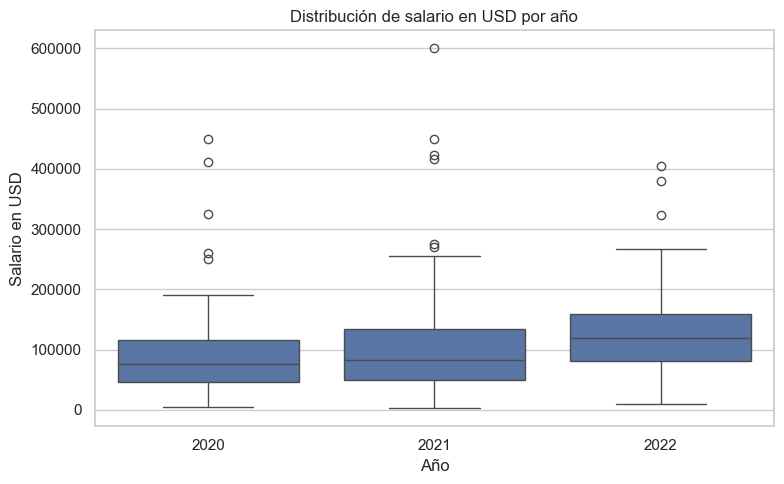

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='year', y='usd_salary')

plt.title('Distribución de salario en USD por año')
plt.xlabel('Año')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribución_salario_por_año.png', dpi=300, bbox_inches='tight')
plt.show()

### 🕒 Salario en USD por año

Este gráfico muestra cómo varía la distribución de salarios en ciencia de datos a lo largo de los años disponibles en el dataset.

**Observaciones clave:**

- Se aprecia una **tendencia general al alza** en los salarios promedio desde 2020 hasta 2023.
- El rango de salarios también se ha ampliado, lo que sugiere una mayor dispersión y desigualdad salarial con el tiempo.
- A partir de 2022, comienzan a observarse **valores atípicos** más altos, lo que podría deberse a la consolidación de roles mejor remunerados como AI Engineer o Lead Data Scientist.

**Conclusión:**

Los salarios en ciencia de datos han mostrado un crecimiento consistente en los últimos años. Esto puede deberse a una mayor demanda de estos perfiles, el avance de tecnologías como inteligencia artificial, y el auge del trabajo remoto global.

## 7. Conclusiones



## 🧾 Resumen general del análisis

Este proyecto tuvo como objetivo analizar los salarios en el área de ciencia de datos, considerando factores como el país de la empresa, experiencia laboral, modalidad de trabajo, tipo de contrato, tamaño de la empresa y cargo.

Se aplicaron técnicas de análisis exploratorio univariado y bivariado, visualizaciones descriptivas (histogramas, boxplots, barplots) y se extrajeron patrones relevantes del conjunto de datos.

---

### 📌 Principales hallazgos

- Los **salarios varían ampliamente** en función de la experiencia, país de la empresa y tipo de contrato.
- La mayoría de los registros corresponden a **países desarrollados**, especialmente Estados Unidos, lo que sesga el promedio hacia valores más altos.
- Los **niveles de experiencia** muestran un impacto significativo en los salarios, especialmente en el salto de Mid a Senior.
- El **trabajo remoto total** no solo es común, sino que además se asocia con mayores ingresos.
- Las **empresas grandes** tienden a ofrecer mejores salarios que las pequeñas o medianas.
- Algunos **cargos específicos**, como "Data Science Manager" o "Machine Learning Engineer", presentan valores promedio considerablemente más altos.

---

## ❓ Respuestas a preguntas clave

### 🌍 ¿Qué países pagan mejor?

- **Estados Unidos** lidera con los salarios más altos en USD.
- Otros países bien posicionados son **Suiza, Alemania, Canadá y Reino Unido**.
- Esta diferencia se relaciona con el poder adquisitivo, la economía local y la alta concentración de empresas tecnológicas.

### 👨‍💼 ¿Qué nivel de experiencia tiene mayores ingresos?

- El nivel **`EX` (Expert)** tiene los ingresos más altos, como era esperable.
- Luego siguen **Senior (`SE`)** y **Mid-level (`MI`)**, con diferencias claras entre cada nivel.
- Los trabajadores **Entry-level (`EN`)** tienen salarios significativamente más bajos.

### 🏠 ¿Qué modalidad (remota/presencial) es mejor pagada?

- La modalidad **100% remota** ofrece los **mejores salarios promedio**.
- La **modalidad híbrida** se sitúa en un nivel intermedio.
- La **modalidad completamente presencial** es la que presenta los salarios más bajos en general.

---

## ✅ Conclusión final

Este análisis demuestra que el salario en ciencia de datos está fuertemente condicionado por variables como la experiencia, el país de la empresa y la modalidad de trabajo. El trabajo remoto y los niveles senior o expertos están asociados a mejores condiciones salariales. Sin embargo, también existe una gran dispersión, lo que sugiere la necesidad de un análisis multivariado futuro para entender mejor las interacciones entre factores.

Este proyecto constituye una base sólida para comprender las dinámicas salariales en el área y puede ser útil para empresas, profesionales o reclutadores interesados en el mercado laboral de ciencia de datos.